<a href="https://colab.research.google.com/github/mackly45/BDE-ESCIC/blob/main/alcool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prince pandas matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 5.4 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Alcool-UTF8-PointVirgule.csv to Alcool-UTF8-PointVirgule.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import prince

In [4]:
# 1. Lecture des données
df = pd.read_csv("Alcool-UTF8-PointVirgule.csv", sep=";", index_col=0)
print("✅ Données chargées")
df.head()

✅ Données chargées


,PASTIS,WHISKY,MARTINI,SUZE,VODKA,GIN,MALIBU,BIERE
Aime le goût,49,50,42,18,25,23,25,59
Avec des amis,83,83,76,60,69,68,69,74
Pour se détendre,61,61,51,32,38,39,39,72
Qui revient cher,60,88,42,41,75,70,61,19
"Rafraîchissante, désaltérante",78,22,18,19,17,19,14,80


In [5]:
# 2. Statistiques descriptives
print(df.describe().T)

                      count   mean        std  min    25%   50%    75%   max
PASTIS                 20.0  47.50  27.867166  3.0  25.50  47.0  67.50  88.0
WHISKY                 20.0  57.30  28.809903  4.0  33.75  61.5  84.00  92.0
MARTINI                20.0  40.65  27.120152  9.0  16.75  32.5  59.25  87.0
SUZE                   20.0  31.25  20.940706  8.0  16.00  25.5  41.50  79.0
VODKA                  20.0  44.70  26.754439  5.0  18.50  45.0  69.25  84.0
GIN                    20.0  43.90  26.074589  6.0  19.00  44.0  68.25  82.0
MALIBU                 20.0  41.35  24.340296  8.0  17.00  41.0  62.50  80.0
BIERE                  20.0  55.40  26.300690  4.0  40.00  59.5  75.50  90.0


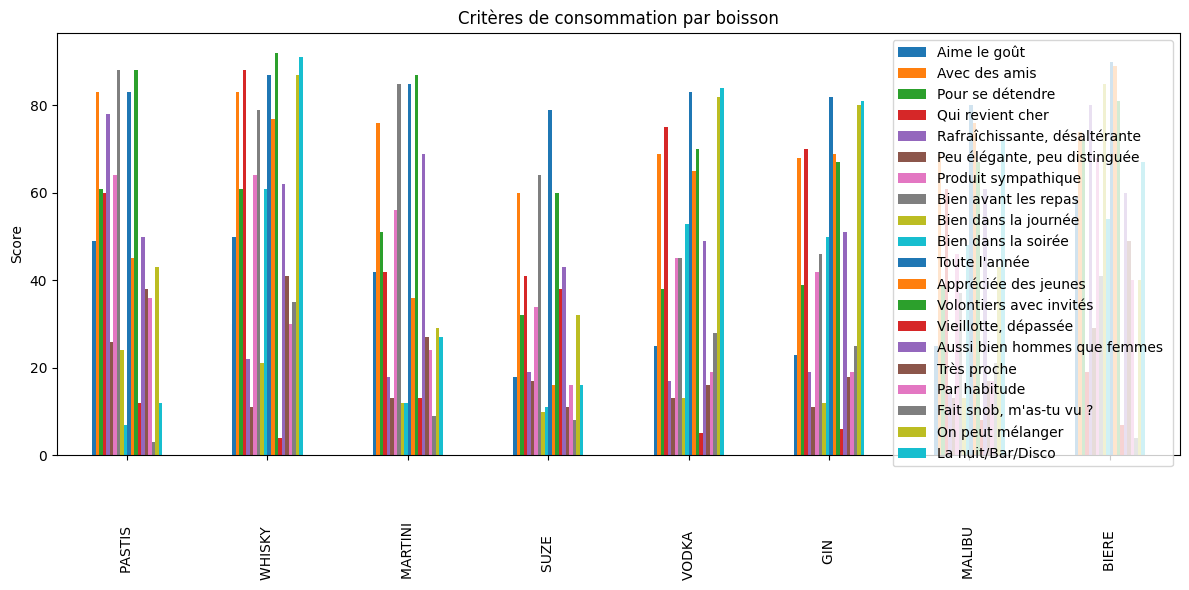

In [6]:
# 3. Diagramme en barres
df.T.plot(kind="bar", figsize=(12, 6))
plt.title("Critères de consommation par boisson")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

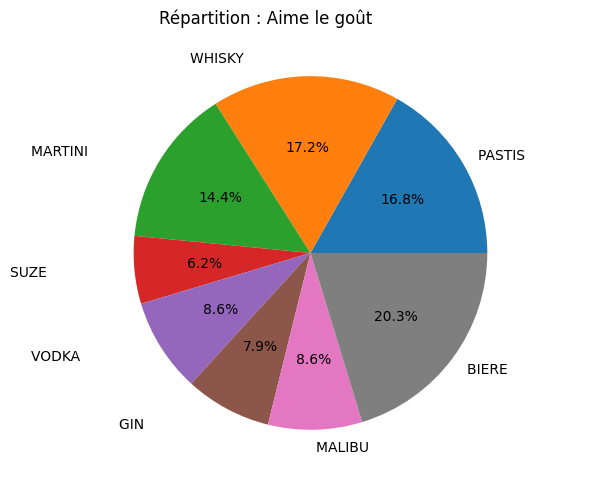

In [7]:
# 4. Camembert
critere = df.index[0]
df.loc[critere].plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title(f"Répartition : {critere}")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [8]:
# 5. AFC
afc = prince.CA(n_components=2)
afc = afc.fit(df)
rows = afc.row_coordinates(df)
cols = afc.column_coordinates(df)

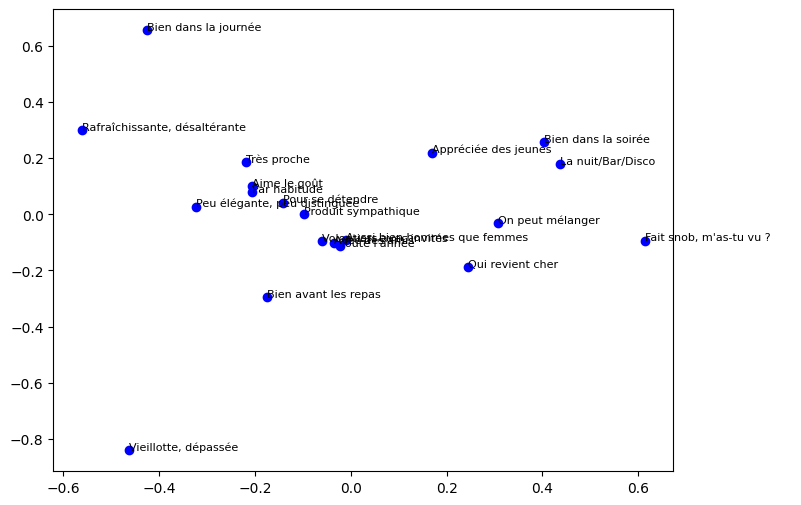

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(rows[0], rows[1], c='blue', label='Critères')
for i, txt in enumerate(rows.index):
    plt.annotate(txt, (rows.iloc[i,0], rows.iloc[i,1]), fontsize=8)

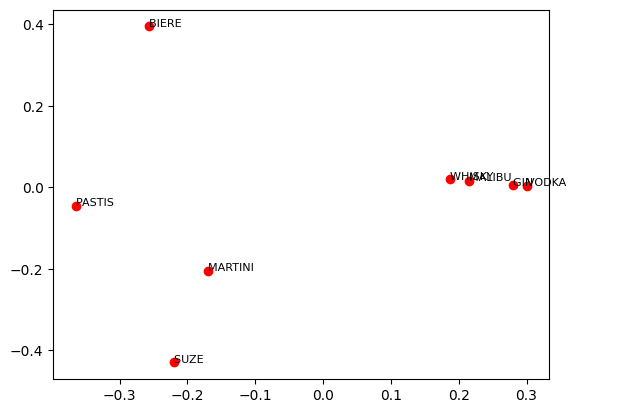

In [10]:
plt.scatter(cols[0], cols[1], c='red', label='Boissons')
for i, txt in enumerate(cols.index):
    plt.annotate(txt, (cols.iloc[i,0], cols.iloc[i,1]), fontsize=8)


<ipython-input-11-1025229905>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


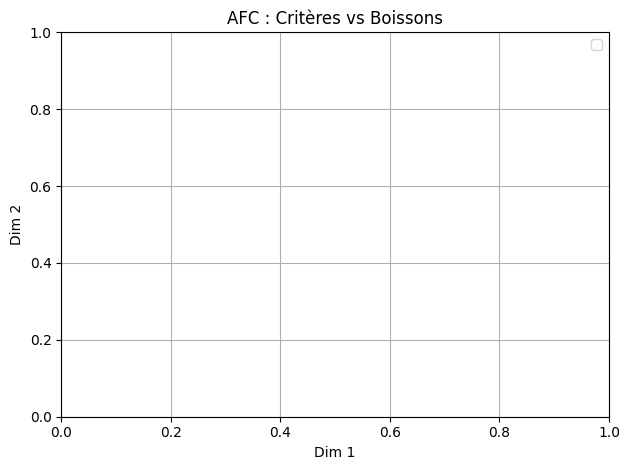

In [11]:
plt.title("AFC : Critères vs Boissons")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

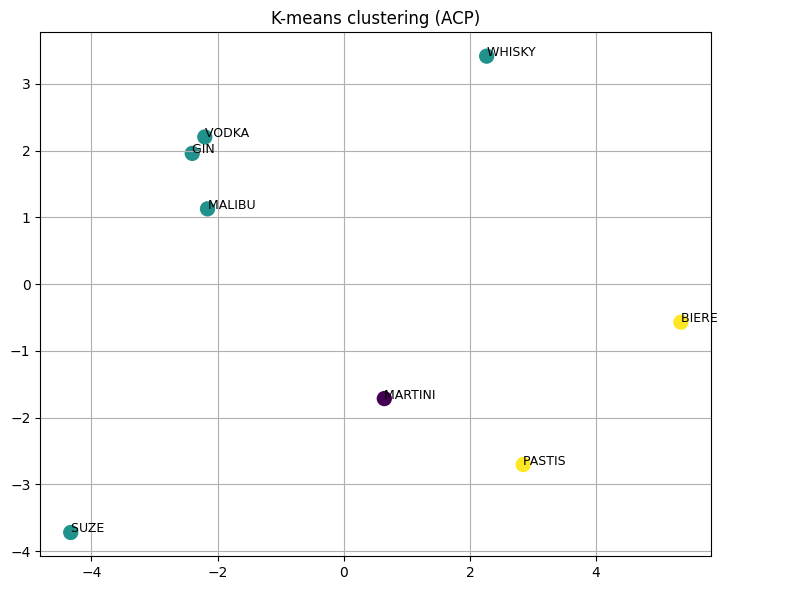

In [12]:
# 6. K-Means + ACP
X = df.T
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=100)
for i, txt in enumerate(X.index):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=9)
plt.title("K-means clustering (ACP)")
plt.grid(True)
plt.tight_layout()
plt.show()


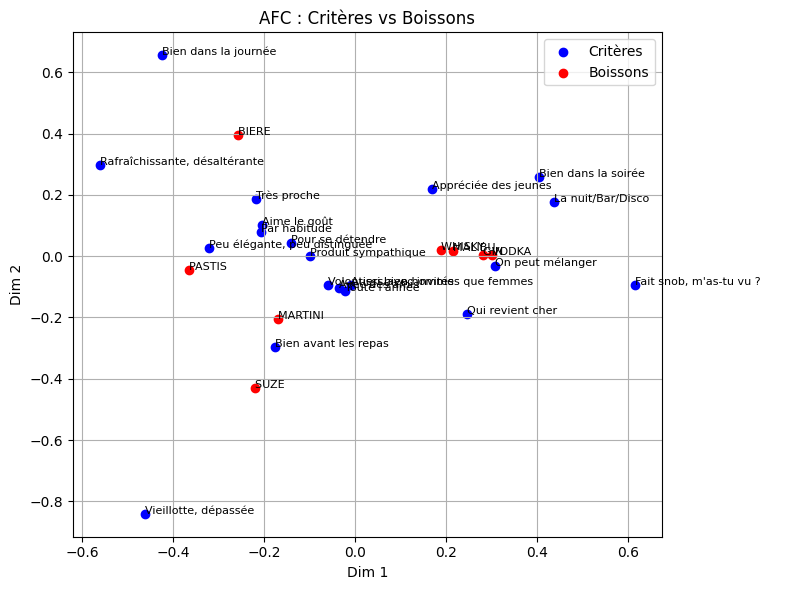

In [13]:
afc = prince.CA(n_components=2)
afc = afc.fit(df)
rows = afc.row_coordinates(df)
cols = afc.column_coordinates(df)

plt.figure(figsize=(8,6))
plt.scatter(rows[0], rows[1], c='blue', label='Critères')
for i, txt in enumerate(rows.index):
    plt.annotate(txt, (rows.iloc[i,0], rows.iloc[i,1]), fontsize=8)

plt.scatter(cols[0], cols[1], c='red', label='Boissons')
for i, txt in enumerate(cols.index):
    plt.annotate(txt, (cols.iloc[i,0], cols.iloc[i,1]), fontsize=8)

plt.title("AFC : Critères vs Boissons")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()